# Chapter 4 - 벡터 공간

- 이 책에서 다루는 모든 것에 기반이 디는 벡터공간에 대한 개념에 대해 알아볼 것이다.

# 4.1 선형결합(일차결합)

## 4.1.1 선형결합의 정의

### Definition 4.1.1
$v_1, ..., v_n$ 각각을 벡터라고 하자. $v_1, ..., v_n$의 *선형결합*을 다음과 같은 합이라고 정의하자.
$$\alpha_1v_1+...+\alpha_nv_n$$
    여기서, $\alpha_1, ... \alpha_n$은 스칼라이다. 이 선형결합에서 $\alpha_1, ... \alpha_n$ 각각은 *계수*라고 한다. $\alpha_1$은 $v_1$의 계수이고, $\alpha_2$는 $v_2$의 계수이며, ... $\alpha_n$은 $v_n$의 계수이다.

### Example 4.1.2
다음은 [2,3.5]와 [4,10]의 선형결합 중 하나이다.

-5[2,3.5]+2[4,10] = [-2, 2.5]

동일한 벡터들에 대한 또 다른 선형겹할은 아래와 같이 쓸 수 있다.

0[2,3.5]+0[4,10] = [0, 0]

- 만약 선형결합에서 모든 계수가 0이면, *자명한(trivial)* 선형결합이다.

## 4.1.2 선형결합의 사용

### Example 4.1.3
주식 포토플리오

$\alpha_i$를 소유하고 있는 주식 펀드 i의 소유 주식 수라고 하자. 그러면, 주식의 총 소유권은 다음 선형결합에 의해 나타낼 수 있다.
$$\alpha_1v_1+...+\alpha_nv_n$$

### Example 4.1.4
식단 계획

77개의 서로 다른 식품과 9가지의 영향 요구량을 고려해보자. 각 식품의 한 유닛이 9개 영향 요구량 각각을 얼마나 만족하는지 계산하였다. 결과는 각 식품에 하나씩 77개의 9-벡터 $v_i$로 나타낼 수 있다. 가능한 식단은 각 식품의 양에 의해 표현되며, 밀가루 1파운드, 양배추 0.5파운드 등으로 나타낸다. i=1,...77에 대해 $\alpha_i$는 식단에 의해 명시된 식품 i의 양이라고하자. 그러면, 선형결합은 아래와 같다.

$$\alpha_1v_1+...+\alpha_nv_n$$

### Example 4.1.5
평균 얼굴

3개의 벡터로 표현되는 이미지를 계수가 1/3, 1/3, 1/3인 선형결합은 3개의 얼굴 사진의 평균을 얻는다.

### Example 4.1.6
제품과 리소스

각 제품을 만드는데 필요한 리소스를 벡터로 표현할 수 있다. 공장에서 만들려는 제품들의 총 리소스는 선형결합으로 표현된다.
다음은 파이썬에서 선형결합을 Vec클래스를 사용하여 어떻게 쓸 수 있는지 보여준다.

In [4]:
from vec import Vec

D = {'metal', 'concrete', 'plastic', 'water', 'electricity'}
v_gnome = Vec(D, {'concrete':1.3, 'plastic':.2, 'water':.8, 'electricity':.4})
v_hoop = Vec(D, {'plastic':1.5, 'water':.4, 'electricity':.3})
v_slinky = Vec(D, {'metal':.25, 'water':.2, 'electricity':.7})
v_putty = Vec(D, {'plastic':.3, 'water':.7, 'electricity':.5})
v_shooter = Vec(D, {'metal':.15, 'plastic':.5, 'water':.4, 'electricity':.8})

print(240*v_gnome + 55*v_hoop + 150*v_slinky + 133*v_putty + 90*v_shooter)


 concrete electricity metal plastic water
-----------------------------------------
      312         356    51     215   373


## 4.1.3 계수에서 선형결합으로

- 길이가 n인 벡터들의 리스트 $[v_1,...v_n]$에 대해, 길이가 n인 계수들의 리스트 $[\alpha_1,...\alpha_n]$를 대응하는 선형결합 $\alpha_1v_1+...+\alpha_nv_n$에 대해 매핑하는 함수 f가 있다.
- 계수에서 선형결합은 fowrad problme으로 주어진 정의역의 원소에 대해 함수의 상(함수값)을 찾는 것이다.

### Quiz 4.1.7
lin_comb(vlist, clist)를 정의해 보자.
- input: 벡터들의 리스트 vlist, 스칼라들로 구성된 동일한 길이의 리스트 clist
- output: clist내 대응하는 값들을 계수로 가지는 vlist내 벡터들의 선형결합인 벡터

In [1]:
def lin_comb(vlist, clist):
    return sum([c*v for c,v in zip(clist, vlist)])

## 4.1.4 선형결합에서 계수로

- 선형결합에서 계수로는 backward problem으로 볼 수 있다.
- 함수 f에 대해 b의 원상을 구할 수 있는가?
- 해가 하나뿐인지 아닌지 어떻게 알 수 있는가?
- 만약 b의 원상이 다수 있다면, 제대로 계산했는지 확신할 수 없다.

### Computational Problem 4.1.8
주어진 벡터를 다른 주어진 벡터들의 선형결합으로 표현하기
- input: 벡터 b와 n벡터들의 리스트 $[v_1,...v_n]$
- output: 다음을 만족하는 계수들의 리스트 $[\alpha_1,...\alpha_n]$

$\quad \quad \quad \quad b=\alpha_1v_1+...+\alpha_nv_n$

  또는 해가 없다고 리포트

A) Lights Out문제와 동일한 문제로 지금 풀어보라는 의도보다는 한번 읽어보라는 의도인 듯한다.

- 5장에서, 선형시스템의 해를 구하는 것은 주어진 벡터 b와 동일한 주어진 벡터들 $v_1,...v_n$의선형결합을 찾는 것과 같다는 것을 알아볼 것이다.
- 그러프로 위 계산문제는 선형방정식들의 시스템의 해를 구하는 문제 Computational Problem 3.9.12와 동일하다.

### Example 4.1.9
Lights Out의 문제는 선형결합의 개념을 사용하여 구성할 수 있다. GF(2)상에서 계수는 0이 아니면 1이다. 여기서의 목적은 합이 sDLS 25개 버튼 벡터들의 선형결합을 찾는 것이다. 
$$s=\alpha_{0,0}v_{0,0}+...+\alpha_{4,4}v_{4,4}$$
즉, 또 다시 Computational Problem 4.1.8을 풀어야 한다.

### Quiz 4.1.10
2x2 Lights Out 퍼즐을 사용하여 s={(0,0):1, (1,1):1}을 아래 버튼 벡터들의 선형결합으로 어떻게 표현하는지 보여라.

In [10]:
from GF2 import one

def scalar_vec_mul(scalar, vec): return {key:scalar*val for key,val in vec.items()}
def add(vec1, vec2): return {key:vec1[key]+vec2[key] for key in v1.keys()}

s={(0,0):one, (0,1):0, (1,0):0, (1,1):one}
v1 = {(0,0):one, (0,1):one, (1,0):one, (1,1):0}
v2 = {(0,0):one, (0,1):one, (1,0):0, (1,1):one}
v3 = {(0,0):one, (0,1):0, (1,0):one, (1,1):one}
v4 = {(0,0):0, (0,1):one, (1,0):one, (1,1):one}
ans = add(add(add(scalar_vec_mul(one, v1), scalar_vec_mul(0, v2)), scalar_vec_mul(0, v3)), scalar_vec_mul(one, v4))
ans

{(0, 0): one, (0, 1): 0, (1, 0): 0, (1, 1): one}

# 4.2 생성(Span)

## 4.2.1 생성의 정의

### Definition 4.2.1
벡터들 $v_1,...,v_n$의 모든 선형결합으로 이루어진 집합을 이 벡터들의 생성이라 하고 $Span\{v_1,...,v_n\}$라고 쓴다.

- $\mathbb {R, C}$와 같은 무한 필드 위의 벡터들에 대해, 생성은 보통 무한집합이다.

### Quiz 4.2.2
필드 GF(2)상의 Span{[1,1],[0,1]}에 몇 개의 벡터가 있는가?

A) 4개
- 0[1,1]+0[0,1]=[0,0]
- 1[1,1]+0[0,1]=[1,1]
- 0[1,1]+1[0,1]=[0,1]
- 1[1,1]+1[0,1]=[1,0]

### Quiz 4.2.3
필드 GF(2)상의 Span{[1,1]}에 몇 개의 벡터가 있는가?

A) 2 개
- 0[1,1]=[0,0]
- 1[1,1]=[1,1]

### Quiz 4.2.4
2-벡터들로 구성되는 집합에서 공집합의 생성에는 몇 개의 벡터가 있는가?

A) 빈 할당(empty assignmnet)로 벡터들의 공집합의 합을 구하면(Problem 2.7.9을 생각해 보면) [0,0]이 구해진다.

### Quiz 4.2.5
$\mathbb R$상의 2-벡터 [2,3]의 생성에는 몇 개의 벡터가 있는가?

A) 무한개이다. 특히 원점과 [2,3]을 지나는 직선으로 표현할 수 있다.

### Quiz 4.2.6
Span{v}가 유한개의 벡터들로 구성되는 $\mathbb R$상의 2-벡터 v는 무엇인가?

A) 영벡터 [0,0]이다.

## 4.2.2 선형방정식들의 시스템이 암시하는 다른 방정식들

### Example 4.2.7
섹션 3.9.6의 단순한 인증기법에 대해 다시 생각해 보자. 사용자는 도트곱 $a\cdot \hat x$로 응답해야 한다. 이브가 시도 $a_1,a_2,a_3$와 대응하는 응받을 안다고 가정해보자. 어떤 가능한 시도 벡터들에 대해 이브는 올바른 응답을 구할 수 있는가?

세 개의 벡터가 있으므로 세 개의 계수를 선택할 수 있고, 각 계수에 대해 0, 1 두가지 선택이 있다. 그러므로 생성에는 8개의 백테가 있으며, 만약 시도가 생성내에 있으면, 이브는 올바른 응답을 계산할 수 있다.

---

좀 더 일반적으로, 벡터 $\hat x$가 임의의 필드상에서 아래 선형방정식을 만족하면,
$$a_1\cdot x = \beta_1$$
$$...$$
$$a_m\cdot x = \beta_m$$
$\hat x$와 $a_1,...a_m$의 생성에 있는 임의의 벡터 a의 도트곱을 계산할 수 있다. $a=\alpha_1a_1+...\alpha_ma_m$이라고 해 보자. 그러면, 다음이 성립한다.

$a\cdot x = (\alpha_1a_1+...+\alpha_ma_m)\cdot x$

$ \quad \quad = \alpha_1a_1\cdot x+...+\alpha_ma_m\cdot x$

$ \quad \quad = \alpha_1(a_1\cdot x)+...+\alpha_m(a_m\cdot x)$

$ \quad \quad = \alpha_1\beta_1+...+\alpha_m\beta_m$

위 식은 Question 3.9.20(선형방정식들의 시스템은 다른 선형방정식들을 암시하는가?)에 대한 답을 준다. 만약 그렇다면, 암시되는 선형방정식들은 무엇인가? $a_1,...a_m$의 생성에 있는 모든 벡터 a에 대해, 선형방정식들의 시스템은 $a\cdot x=\beta$형태의 선형방정식을 암시한다.

### Example 4.2.8
이브는 $Span = \{a_1,...a_m\}$에 있는 임의의 시도에 대해 답할 수 있다. 이것은 모든 가능한 시도를 포함하는가? 이것은 $GF(2)^n$이 $Span=\{a_1,...a_m\}$과 동일한지 질문하는 것과 같다.

A) Span은 모든 가능한 시도를 포함한다. $GF(2)^n$과 Span은 동일하다.

## 4.2.3 생성자(Generator)

### Definition 4.2.9
$\nu$를 벡터들의 집합이라 하자. 만약 $v_1,...,v_n$이 $\nu=Span\{v_1,...v_n\}$을 만족하는 벡터들이면, $\{v_1,...v_n\}$은 $nu$에 대한 생성집합(generating set)이라 하고 벡터 $v_1,...,v_n$을 $\nu$에 대한 생성자(generator)들이라고 한다.

### Example 4.2.10
Example 4.2.7에서 주어진 3개의 벡터들로 8개의 벡터를 Span의 집합으로 표현했다. 이 3개의 벡터 집합은 생성집합이고, 3개의 벡터는 생성자가 된다.

### Example 4.2.11
{[3,0,0],[0,2,0],[0,0,1]}은 $\mathbb R^3$에 대핸 생성집합이라고 주장해보자. 이 주장을 증명하려면, 이 세 벡터들의 선형결합들로 구성된 집합이 $\mathbb R^3$와 동일함을 보여야 한다. 이것은 아래 두 가지를 보여야 한다는 것을 의미한다.
1. 모든 선형결합은 $\mathbb R^3$내의 벡터이다.
2. $\mathbb R^3$내의 모든 벡터는 선형결합이다.

첫 번째 경우는 $\mathbb R^3$가 $\mathbb R$상의 모든 3-벡터들을 포함하므로 명백하다. 두ㅂ 번째 경우를 증명하기 위해서는 [x,y,z]는 $\mathbb R^3$내의 임의의 벡터라고 하자. [x,y,z]는 선형결합으로 쓸수 있음을 보여야 한다.
$$[x,y,z]=(x/3)[3,0,0]+(y/2)[0,2,0]+z[0,0,1]$$

## 4.2.4 선형결합의 선형결합

$\mathbb R^3$에 대한 또 다른 생성집합은 [1,0,0],[1,1,0],[1,1,1,]이라고 주장해 보자. 이번에는 이들의 생성이 $\mathbb R^3$의 모든 생성을 포함한다는 것을 증명해야 한다. 이것은 Example 4.2.11의 세 벡터의 각각을 선형결합으로 나타내면된다. 왜 이렇게만 하면 충분할까? 왜냐하면, 이전 벡터들의 각각은 다시 새로운 벡터들의 선형결합으로 나타낼 수 있기 때문에 이전 벡터들의 임의의 선형결합은 새로운 벡터들의 선형결합으로 변결할 수 있다.

$\mathbb R^3$내의 임의의 베겉는 위의 세 벡터의 선형결합으로 나나낼 수 있음을 보렸다. 이것은 $\mathbb R^3$는 Span{[1,0,0],[1,1,0],[1,1,1]}의 부분집합임을 보여준다. 물론, 이들 벡터의 모든 선형결합은 $\mathbb R^3$에 속하고, 이것은 Span{[1,0,0],[1,1,0],[1,1,1]}은 $\mathbb R^3$의 부분집합을 의미한다. 이 두 집합의 각각은 다른 집합의 부분집합이므로 두 집합은 동일하다.

### Quiz 4.2.12
이전 벡터들 [3,0,0],[0,2,0],[0,0,1]의 각각을 새로운 벡터들 [2,0,1],[1,0,2],[2,2,2]들의 선형결합으로 나타내 보자.

In [9]:
from vec import Vec

def list2vec(L):
    return Vec(set(range(len(L))), {i:L[i] for i in range(len(L))})

v1 = list2vec([2,0,1])
v2 = list2vec([1,0,2])
v3 = list2vec([2,2,2])

print(2*v1-v2+0*v3)
print(-2/3*v1-2/3*v2+v3)
print(-1/3*v1+2/3*v2+0*v3)


 0 1 2
------
 3 0 0

 0 1 2
------
 0 2 0

 0 1 2
------
 0 0 1


## 4.2.5 표준 생성자(Standard generator)

- [1,0,0],[0,1,0],[0,0,1]은 $\mathbb R^3$에 대한 가장 자연스러운 생성자임을 나타낸다.
- 이러한 세 벡터를 $\mathbb R^3$에 대한 표준 생성자라고하고 $e_0, e_1, e_2$로 나타낸다.
- 예를 들어, $\mathbb R^4$에 대한 표준 생성자를 나타낼 때는 $e_0, e_1, e_2, e_3$을 사용하고 [1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]을 의미한다.
- 임의의 유한한 정의역 D와 필드 F에 대해, $F^D$에 대한 생성자가 당연히 있다. 각 $k\in D$에 대해, $e_k$는 함수 {k:1}이다. 즉, $e_k$은 k를 1에 매핑하고 정의역의 모든 다른 원소를 0에 매핑한다.

### Quiz 4.2.13
standard(D, one)을 작성해 보자. 이 프로시저는 주어진 정의역 D와 필드에 대해 주어진 숫자 one에 대해 $\mathbb R^D$에 대한 표준 생성자들의 리스트를 리턴한다(숫자 one은 인수로 제공되므로 이 프로시저는 GF(2)를 사용할 수 있다.

In [16]:
def standard(D, one): return [Vec(D, {k:one}) for k in D]

standard(set([1, 2, 3]), one)

[Vec({1, 2, 3},{1: one}), Vec({1, 2, 3},{2: one}), Vec({1, 2, 3},{3: one})]

### Quiz 4.2.14
2x2 Lights Out 퍼즐은 모든 초기 상태에 대해서 풀 수 있는가? 이 질문은 2x2 버튼 벡터가 $GF(2)^D$에 대한 생성자인지 묻는 것과 같다.

In [22]:
D=set([(0,0),(0,1),(1,0),(1,1)])

v1 = Vec(D, {(0,0):one, (0,1):one, (1,0):one, (1,1):0})
v2 = Vec(D, {(0,0):one, (0,1):one, (1,0):0, (1,1):one})
v3 = Vec(D, {(0,0):one, (0,1):0, (1,0):one, (1,1):one})
v4 = Vec(D, {(0,0):0, (0,1):one, (1,0):one, (1,1):one})

print(v1+v2+v3+0*v4)
print(v1+v2+0*v3+v4)
print(v1+0*v2+v3+v4)
print(0*v1+v2+v3+v4)


 (0, 0) (0, 1) (1, 0) (1, 1)
----------------------------
    one      0      0      0

 (0, 0) (0, 1) (1, 0) (1, 1)
----------------------------
      0    one      0      0

 (0, 0) (0, 1) (1, 0) (1, 1)
----------------------------
      0      0    one      0

 (0, 0) (0, 1) (1, 0) (1, 1)
----------------------------
      0      0      0    one


### Quiz 4.2.15
아래 각 문제에 대해 주어진 벡터들이 $\mathbb R^2$를 생성하는지 알아 보자. 만약 가능하다면, $\mathbb R^2$에 대한 각 표준 생성자를 주어진 벡터들의 선형결합으로 나타내 보자. 만약 아래 문제 중 어느 하나에 대해 이것이 가능하지 않다면, 먼저 하나의 벡터를 추가한 다음에 수행해 보자.

In [2]:
import numpy as np

# 1
v1 = np.array([1,2])
v2 = np.array([3,4])
print(-2*v1+v2)
print(3/2*v1-1/2*v2)
print()

# 2
v1 = np.array([1,1])
v2 = np.array([2,2])
v3 = np.array([3,3])
# 불가능, [0,1]벡터 추가
v4 = np.array([0,1])
print(v1-v4)
print(v4)
print()

# 3
v1 = np.array([1,1])
v2 = np.array([1,-1])
v3 = np.array([0,1])
print(v1-v3)
print(v3)

[1 0]
[ 0.  1.]

[1 0]
[0 1]

[1 0]
[0 1]


# 4.3 벡터들의 집합에 대한 기학적 구조

- 이 섹션에서는 $\mathbb R$상의 벡터들의 생성에 대한 기학적 구조를 살펴본다.

## 4.3.1 $\mathbb R$상의 벡터들의 생성에 대한 기하적 구조

- 1차원 객체(직선)
 - 하나의 영이 아닌 벡터 v의 모든 선형결합은 원점과 v를 지나는 직선을 형성한다.
 - $Span\{v\}=\{\alpha v: \alpha \in \mathbb R\}$
- 0차원 객체(점)
 - 공집합에 대한 생성으로 영벡터로 하나의 점으로 구성된다.
- 임의의 벡터들에 대한 생성은 원점을 포함해야 한다. 이유는 자명한 선형결합(모든 계수가 영인 경우)이 집합에 포함되기 때문이다.

### Example 4.3.1
Span{[1,0],[0,1]}은 무엇인가? 이 벡터들은 $\mathbb R^2$에 대한 표준 생성자들이고 그래서 모든 2-벡터는 생성내에 있다. 따라서 Span{[1,0],[0,1]}은 유클리드 평면(Euclidean plane)의 모든 점을 포함한다.

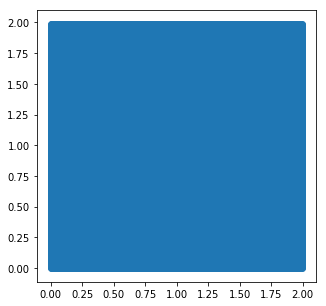

In [157]:
import matplotlib.pyplot as plt

v1 = np.array([1,0])
v2 = np.array([0,1])
span = [(a/100)*v1+(b/100)*v2 for a in range(200) for b in range(200)]
span = np.array(span)

plt.figure(figsize=(5, 5))
plt.scatter(span[:,1], span[:,0])
plt.show()

### Example 4.3.2
Span{[1,2],[3,4]}은 무엇인가? Exersie에서 $\mathbb R^2$에 대한 표준 생성자들은 벡터들의 선형결합으로 표현될 수 있음을 살펴보았다. 따라서 이 두벡터의 선형결합으로 구성되는 집합은 평면의 모든 점을 포함한다는 것을 알 수있다.

### Example 4.3.3
두 개의 3-벡터들의 생성은 무엇인가? [1,0,1.65]와 [0,1,1]의 선형결합은 원점을 지나는 평면을 형성한다. 아래 그림은 이러한 평면의 일부를 보여준다.
평면을 그리는데 두 개의 벡터를 사용할 수 있다.

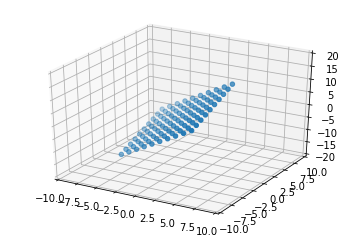

In [50]:
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([1,0,1.65])
v2 = np.array([0,1,1])

span = np.array([a*v1 + b*v2 for a in range(-5, 5) for b in range(-5, 5)])

plt3d = plt.figure().gca(projection='3d')
plt3d.scatter(span[:,0], span[:,1], span[:,2])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt3d.set_zlim(-20,20)
plt.show()

### Example 4.3.4
모든 두 개의 서로 다른 벡터들은 평면을 생성하는가? Span{[1,2],[2,4]}은 무엇인가? 임의의 계수 $\alpha_1, \alpha_2$에 대해 다음과 같이 쓸 수 있다.

$\alpha_1[1,2]+\alpha_2[2,4]=(\alpha_1+2\alpha_2)[1,2]$

이것은 Span{[1,2],[2,4]}=Span{[1,2]}임을 보여준다. Span{[1,2]}은 평면이 아니라 직선을 형성한다.

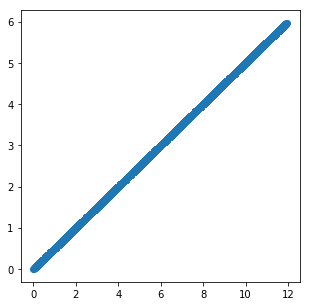

In [51]:
v1 = np.array([1,2])
v2 = np.array([2,4])
span = [(a/100)*v1+(b/100)*v2 for a in range(200) for b in range(200)]
span = np.array(span)

plt.figure(figsize=(5, 5))
plt.scatter(span[:,1], span[:,0])
plt.show()

___

- 영벡터들이 생성은 점, 즉 영차원 객체를 형성한다. 이것은 원점이다.
- 하나의 벡터의 생성은 원점을 지나는 직선, 즉 1차원 객체, 또는 어떤 점, 즉 원점을 형성한다.
- 두 벡터의 생성은 원점을 지나는 평면, 즉 2차원 객체, 또는 원점을 지나는 직선, 또는 어떤 점, 즉 원점을 형성한다.

### Hypothesis 4.3.5
$\mathbb R$상의 k벡터들의 생성은 원점을 포함하는 k-차원의 flat 또는 원점을 포함하는 더 낮은 차원의 flat을 형성한다.

### Question 4.3.6
k 개 벡터들로 구성된 주어진 컬렉션의 생성이 k-차원 객체인지 어떻게 알 수 있는가? 좀 더 일반적으로, 주어진 벡터들의 컬렉션에 대해 생성의 차원을 어떻게 예측할 수 있는가?

이 질문은 7장에서 답하기 시작할 것이다.

## 4.3.2 동차 선형시스템의 해집합에 대한 기하적 구조

- 평면을 명시하는 더 익숙한 방식은 방정식, 예를 들어 $\{(x,y,z)\in\mathbb R^3: ax+by+cz=d\}$를 사용하는 것이다.
- 원점이 방정식 ax+by+cz=d를 만족하기 위해서는 d는 영이어야 한다.


### Example 4.3.7
앞에서 보여준 평면 Span{[1,0,0.615], [0,1,1]}은 다음과 같이 나타낼 수 있다.

$\{(x,y,z)\in\mathbb R^3: 1.65x+1y-1z=0\}$

도트곱을 사용하여 위 방정식을 다시 쓰면 다음을 얻는다.

$\{(x,y,z)\in\mathbb R^3: [1.65,1,-1]\cdot[x,y,z]=0\}$

따라서, 평면은 우변이 영인 선형방정식의 해집합이다.

### Definition 4.3.8
우변이 영인 선형방정식은 *동차 선형방정식*이다.

### Example 4.3.9 
아래 직선은 Span{[3,2]}로 나타낼 수 있다.
하지만, 이직선은 또한 다음 식으로 나타낼 수도 있다.

$\{(x,y,z)\in\mathbb R^2: 2x-3y=0\}$

즉, 위 직선은 동차 선형방정식의 해집합이다.

### Example 4.3.10
아래 직선은 Span{[-1,-2,2]}로 나타낼 수 있다. 또한, 이 직선은 동차 선형방정식 쌍들의 해집합으로 나타낼 수도 있다.

$\{(x,y,z)\in\mathbb R^3: [4,-1,1]\cdot[x,y,z]=0, [0,1,1]\cdot[x,y,z]=0\}$

즉, 위 직선은 두 동차 선형방정식들을 만족하는 트리플[x,y,z]들의 집합으로 구성된다.

### Definition 4.3.11
우변이 모두 영인 선형시스템(선형방정식들의 컬렉션)은 *동차 선형시스템*이라고 한다.

### Hypothesis 4.3.12
원점을 포함하는 flat은 동차 선형시스템의 해집합이다.

## 4.3.3 원점을 포함하는 flat의 두 가지 표현

지금까지 원점을 포함하는 flat을 나타내는 두 가지 방법을 살펴보았다.
- 어떤 벡터들이 생성으로서
- 동차 선형시스템의 해집합으로서

___
두 개의 주어진 직선을 포함하는 평면을 찾고자 한다고 해보자. 직선 Span{[4,-1,1]}와 직선 Span{[0,1,1]}은 아래와 같다.
위 두 직선들은 생성을 나타내므로, 해를 얻는 것은 어렵지 않다. 위 두 직선을 포함하는 평면은 Span{[4,-1,1],[0,1,1]}이다.

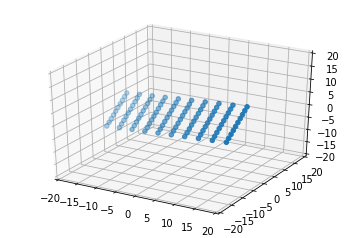

In [55]:
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([4,-1,1])
v2 = np.array([0,1,1])

span = np.array([a*v1 + b*v2 for a in range(-5, 5) for b in range(-5, 5)])

plt3d = plt.figure().gca(projection='3d')
plt3d.scatter(span[:,0], span[:,1], span[:,2])
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt3d.set_zlim(-20,20)
plt.show()

___
한편 주어진 두 평면의 교점을 찾고자 한다고 해 보자. 평면 $\{[x,y,z]: [4,-1,1]\cdot[x,y,z]=0\}$와 평면$\{[x,y,z]: [0,1,1]\cdot[x,y,z]=0\}$이 있다고 하자. 각 평면은 동차 선형시스템의 해집합이으로 표현되므로, 해를 구하는 것은 어렵지 않다. 두 평면에 속하는 점들의 집합은 두 방정식 $\{[x,y,z]: [4,-1,1]\cdot[x,y,z]=0, [x,y,z]: [0,1,1]\cdot[x,y,z]=0\}$을 만족하는 벡터들의 집합이다.

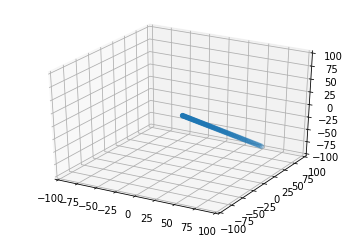

In [105]:
p1 = [(x,y,y-4*x) for x in range(100) for y in range(100)]
p2 = [(x,y,-y) for x in range(100) for y in range(100)]

inter = np.array(list((set(p1) & set(p2))))

plt3d = plt.figure().gca(projection='3d')
plt3d.scatter(inter[:,0], inter[:,1], inter[:,2])
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt3d.set_zlim(-100, 100)
plt.show()

___
각가의 표현은 그 유용성이 있으므로, 하나의 표현법에서 다른 것으로 변환할 수 있는지 알아보자. 벡터들의 생성으로 표현되는 임의의 집합을 동차 선혀잇스템의 해집합으로 표현할 수 있는가? 그 반대인 경우는 어떤가? 이러한 변화 문제는 섹션 7.5에서 좀 더 다룰 것이다. 먼저, 이러한 표현에 대해 수학적으로 더 잘 이해하는 것이 필요하다.

# 4.4. 벡터 공간

## 4.4.1 두 표현의 공통점은 무엇인가?

$F^D$의 부분집합 $\nu$는 $\nu$가 F상의 어떤 D-벡터들의 생성이든지 아니면 선형시스템의 해가 되든지 상관없이 세 가지 성질을 가진다.

### Property V1
$\nu$는 영벡터를 포함한다.

### Property V2
모든 벡터 v에 대해, 만약 $\nu$가 v를 포함하면 $\nu$는 모든 스칼라 $\alpha$에 대해 $\alpha v$를 포함하고 스칼라-벡터 곱에 대해 닫혀 있다.

### Property V3
모든 벡터들의 쌍 u, v에 대해, 만약 $\nu$가 u와 v를 포함하면 $\nu$를 u+v를 포함한다.

## 4.4.2 벡터 공간의 정의와 예

Property V1, V2, V3를 사용하여 두 종류의 표현법(벡터들의 생성, 동차 선형시스템의 해집합)을 포함하는 개념을 정의해 보자.

### Definition 4.4.1
벡터들의 집합 $\nu$는 만약 Property V1, V2, V3를 만족하면 ***벡터공간***이라고 한다.

### Example 4.4.2
어떤 벡터들의 생성은 벡터 공간이다.

### Example 4.4.3
동차 선형시스템의 해집합은 벡터 공간이다.

___
"만약 $\nu$가 v를 포함하면 $\nu$는 모든 스칼라 $\alpha$에 대해 $\alpha v$를 포함한다"란 표현은 수학적 용어로 표현하면 다음과 같다.
 - "$\nu$는 스칼라-벡터 곱셈에 대해 닫혀 있다."
 
"만약 $\nu$가 u와 v를 포함하면 $\nu$는 u+v를 포함한다"란 표현을 수학적 용어로 표현하면 다음과 같다.
 - "$\nu$는 벡터 덧셈에 대해 닫혀 있다."
 
일반적으로 집합이 어떤 연산에 대해 닫혀있다고 하면 이 집합은 그 원소들을 사용하여 연산한 결과로 생성되는 임의의 객체를 포함한다는 것을 의미한다.

### Example 4.4.5
임의의 필드 F와 임의의 유한 정의역 D에 대해, F상의 D-벡터들의 집합 $F^D$는 벡터공간이다. 이유는? $F^D$는 영벡터를 포함하고 스칼라-벡터 곱과 벡터 덧셈에 대해 닫혀있다. 예를 들어, $\mathbb R^2, \mathbb R^3, GF(2)^4$는 모두 벡터공간이다.

### Proposition 4.4.6
임의의 필드 F와 임의의 유한 정의역 D에 대해, 영벡터로 구성되는 한 원소 집합 $0_D$는 벡터 공간이다.

### Definition 4.4.7
영벡터만으로 구성된 벡터공간은 자명한(trivial) 벡터공간이다.

### Quiz 4.4.8
생성이 $\{0_D\}$가 되는 벡터들의 최소 개수는 몇 개인가?

A) 영이다. 즉 공집합이다.

## 4.4.3 부분공간(Subspace)

### Definition 4.4.9
만약 $\nu$와 W는 벡터공간이고 $\nu$가 W의 부분집합이면, $\nu$는 W의 *부분공간*이라고 한다.

집합은 그 자신의 부분집합이다. 따라서, W의 한 부분공간은 W자신이다.

### Example 4.4.10
{[0,0]}의 유일한 부분공간은 그 자신이다.

### Example 4.4.11
집합 {[0,0]}은 $\{\alpha[2,1]: \alpha \in \mathbb R\}$의 부분공간이고, $\{\alpha[2,1]: \alpha \in \mathbb R\}$은 $\mathbb R^2$의 부분공간이다.

### Example 4.4.12
집합 $\mathbb R^2$는 $\mathbb R^3$에 포함되지 않기 때문에 $\mathbb R^3$의 부분공간이 아니다. 사실 $\mathbb R^2$는 2-벡터들로 구성되고 $\mathbb R^3$는 2-벡터들을 포함하지 않는다.

### Example 4.4.13
$\mathbb R^2$에 포함된 벡터공간은 무엇인가?
- 가장 작은 것은 {[0,0]}dlek.
- 가장 큰 것은 $\mathbb R^2$자신이다.
- 임의의 영이 아닌 벡터 [a,b]에 대해, 원점과 [a,b]를 지나는 직선 Span{[a,b]}는 벡터공간이다.

___
벡터공간의 개념은 집합을 형성하는 아래 두 가지 방법을 고려하여 살펴보았다.
- 어떤 벡터들의 생성으로서
- 동차 선형시스템의 해집합으로서

이들 각가은 벡터공간이다. 특히 각각은 어떤 필드 F와 정의역 D에 대해 $F^D$의 부분공간이다.

### Question 4.4.15
$F^D$의 임의의 부분공간이 벡터들로 구성된 유한 집합의 생성으로 표현될 수 있는가?

### Question 4.4.16
$F^D$의 임의의 부분공간이 동차 선형시스템의 해집합으로 표현될 수 있는가?

7장에서 위 질문에 대한 달은 두 다 "예"라는 것을 알게 될 것이다.

## 4.4.4 \*추상(Abstract) 벡터공간

- 현대 수학은 어떤 것을 정의할 때 그 내부구조 보다는 그것이 만족시키는 공리(axiom)들로 정의하는 경향이 있다.
- 필드 F상의 벡터 공간은 덧셈 연산과 스칼라-곱셈 연산을 가지고 있으면 Property V1,V2,V3를 만족하는 임의의 집합 $\nu$로 정의한다. $\nu$의 원소들은 무엇이든 벡터 역할을 한다.
- 이런 식의 정의는 벡터들이 특정 내부구조에 한정되는 것을 피하고 결과적으로 훨씬 넓은 클래스의 수학적 객체들을 벡터로 간주하게 허용한다.
- *이 책에서는 추상적 접근을 피하는데, 그 이유는 벡터에 대해 좀 더 확고한 개념이 직관을 넓히는데 도움이 되기 때문이다.*

# 4.5 아핀(Affine) 공간

원점을 포함하지 않는 점, 직선, 평면 등에 대해 알아 보자.

## 4.5.1 원점을 지나지 않는 flat

원점을 지나지 않는 직선을 어떻게 나타낼 수 있을까?
- 원점을 지나는 직선을 가지고 시작해 보자.
- 이러한 직선의 점들은 벡터공간 $\nu$를 형성함을 안다.
- 어떤 벡터 a를 선택하여 그것을 $\nu$내 모든 벡터에 더할 수 있다.
 - $a + \nu=\{a+v:v\in\nu\}$
 
 
- 결과 집합은 a를 지나는 (원점을 지나는 않는) 직선이다.

### Example 4.5.1
점 $v_1, v_2, v_3$을 지나는 한 평면이 있다. 

평면 위의 점들의 집합을 벡터공간의 평행이동으로 어떻게 나타낼 수 있을까?

$a=u_2-u_1, b=u_3-u_1$라고 정의하고 $\nu$는 벡터공간 Span a,b라고 하자. 그러면, $\nu$의 점들은 평면을 형성한다.

$u_1+\nu$는 다음을 포함한다.
- 점 $u_1$($\nu$가 영벡터를 포함하므로)
- 점 $u_2$($\nu$가 $u_2-u_1$을 포함하므로)
- 점 $u_3$($\nu$가 $u_3-u_1$을 포함하므로)

평면 $u_1+\nu$는 $u_1,u_2, u_3$를 포함하므로 이 점들을 지나는 유일한 평면이어야 한다.

## 4.5.2 아핀결합

### Definition 4.5.2
선형결합 $\alpha_1u_1+...+\alpha_nu_n$은 계수들의 합이 1이면 *아핀결합*이라고 한다.

### Example 4.5.3
선형결합 2[10,20]+3[0,10]+(-4)[30,40]은 그 계수들의 합이 2+3+(-4)=1이므로 벡터들의 아핀결합이다.

### Example 4.5.4
Example 4.5.1에서 $u_1,u_2,u_3$를 지나는 평면을 다음과 같이 표현하였다.

$u_1+\nu$

여기서, $\nu=Span\{u_2-u_1,u_3-u_1\}$

선형결합으로 나타낼 수 있다.

$u_1+\alpha(u_2-u_1)+\beta(u_3-u_1) = (1-\alpha-\beta)u_1+\alpha u_2+\beta u_3$

위의 표현은 아핀결합이다. 즉, $u_1+\nu$내 벡터들은 $u_1,u_2,u_3$의 모든 아핀결합들로 구성된 집합이다.

___
어떤 벡터 컬렉션의 모든 아핀결합으로 구성된 집합은 그 컬렉션이 아핀 hull이라고 한다.
___

### Example 4.5.5
{[0.5,1],[3.5,3]}의 아핀 hull은 무엇인가? 섹션 3.6.4에서 아핀결합들로 구성된 집합을 살펴 보았다.

이것은 [0.5,1],[3.5,3]을 지나는 직선이다.

### Example 4.5.6
{[1,2,3]}의 아핀 hull은 무엇인가? 이것은 계수들의 합이 1이 되는 선형결합들 $\alpha$[1,2,3]으로 구성된 집합이다. 여기서, 계수는 $\alpha$하나밖에 없으므로 $\alpha=1$이다. 따라서, 아핀 hull은 하나의 벡터[1,2,3]으로 구성된다.

___
- 1-벡터 컬렉션의 아핀 hull은 한 점(컬렉션 내의 하나의 벡터), 즉 0-차원 객체이다.
- 2-벡터 컬렉션의 아핀 hull은 직선(두 벡터를 지나는 직선), 즉 1-차원 객체이다.
- 3-벡터 컬렉션의 아핀 hull은 평면(세 벡터를 지나는 평면), 즉 2-차원 객체이다.

하지만 성급하게 결론을 내리지는 말자.

### Example 4.5.7
{[2,3],[3,4],[4,5]}의 아핀 hull은 무엇인가?

이러한 점들은 모두 직선 위에 놓여 있다. 그러므로 이 아핀 hull은 평면이라기보다는 직선이다.

___
어떤 벡터들의 모든 아핀 hull은 어떤 다른 벡터들의 생성에 대한 평행이동이므로 아핀 hull과 생성의 차원에 대한 질문은 동일한 것이다.

## 4.5.3 아핀공간

### Definition 4.5.8
아핀공간은 벡터공간을 평행이동한 결과이다. 즉 집합 A는 다음을 만족하는 벡터 a와 벡터공간 $\nu$가 있으면 아핀공간이다.
$$A=\{a+v:v\in\nu\}$$

### Example 4.5.9
세 점을 지나는 평면은 $u_1$을 $u_2-u_1$과 $u_3-u_1$의 생성에 속하는 각 점에 덧셈을 한 결과로 나타낼 수 있다. Span={$u_2-u_1,u_3-u_1$}은 벡터공간이므로 $u_1,u_2,u_3$를 지나는 평면은 아핀공간이다.

### Lemma 4.5.20
임의의 벡터 $u_1,...u_n$에 대해 다음이 성립한다.
$$\{\alpha_1u_1+...+\alpha_nu_n:\sum^{n}_{i=1}{\alpha_i=1}\} = \{u_1+v:v\in Span\{u_2-u_1,...u_n-u_1\}\}$$
위 식을 말로 표현하면, $u_1,...u_n$의 아핀 hull은 $u_1$을 $u_2-u_1,...u_n-u_1$의 생성에 있는 각 벡터에 더함으로써 얻어지는 집합과 동일하다.

## 4.5.4 아핀공간을 선형시스템의 해집합으로 표현하기

원점을 포함하지 않는 flat을 비도차 선형시스템의 해집합으로 표현한다.

### Example 4.5.11
세 점 [1,0,4.4],[0,1,4],[0,0,3]을 지나는 평면은 이 점들의 아핀 hull이다. 하지만, 이 평면은 또한 방정식 1.4x+y-z=-3의 해집합이며 다음과 같이 나타낼 수 있다.

$\{[x,y,z]\in\mathbb R^3:[1.4,1,-1]\cdot[x,y,z]=-3\}$

### Example 4.5.12
[0.5,1]과 [3.5,3]을 지나는 직선은 두 점의 모든 아핀결합들의 집합으로 구성된다. 이 직선은 또한 방정식 2x-3y=-2의 해집합이며 다음과 같이 표현된다.

$\{[x,y]\in\mathbb R^2: [2,-3]\cdot[x,y]=-2\}$

### Example 4.5.13
아래 직선은 [1,2,1]과 [1,2,-2]의 모든 아핀결합들의 집합으로 표현할 수 있다. 이 직서은 또한 방정식 4x-y+z=3과 y+z=3을 구성하는 선형시스템의 해집합이며 아래와 같이 표현된다.

$\{[x,y,z]\in\mathbb R^3:[4,-1,1]\cdot[x,y,z]=3,[0,1,1]\cdot[x,y,z]=3\}$

## 4.5.5 두 가지 표현법 - 다시 보기

두 가지 방법으로 표현할 수 있는 것은 유용할 수 있다.

### Example 4.5.14
두 개의 직선이 주어여 있고 이 두 직선을 포함하는 평면을 찾고자 한다고 해 보자. 첫 번째 직선은 Span{[4,-1,1]}이고 두 번째 직선은 Span{[0,1,1]}이다. 그러므로 두 직선을 포함하는 평면은 Span{[4,-1,1],[0,1,1]}이다.

### Example 4.5.15
원점을 지나는 두 개의 평면이 있다. 이들의 교집합을 찾아보자. 각 평면은 우변이 영인 선형시스템의 해집합으로 나타낸다. 교 집합을 구성하는 점들의 집합은 두  방정식을 만족하는 바로 그 집합이다. 이러한 점들의 집합은 직선을 형성한다. 하지만 이 직선을 그리기 위해서는 벡터의 생성으로 나타내는 것이 도움이 된다.

___
컴퓨터 그래픽스에서 장면은 흔히 수천 개의 삼각형으로 구성된다. 빛이 어는 하나의 특정 삼각형을 비추는 테스트할 수 있을까? 만약 그렇다면 어느 삼각형을 비추는가?

삼각형의 모서리는 벡터 $v_0,v_1,v_2$에 위치해 있다고 해 보자. 그러면 삼각형을 포함하는 평면은 이 벡터들의 아핀 hull이다.

다음으로, 빛은 점 b에서 발새항혀 벡터 d를 나타내는 화살표 방향으로 향한다고 해 보자. 빛은 점들의 집합을 구성하는 광선을 형성한다.

$\{b+\alpha d: \alpha\in\mathbb R, \alpha\ge0\}$

### Example 4.5.16
삼각형의 꼭지점들이 [1,1,1],[2,2,3],[-1,3,0]고, 빛의 광성는 p=[-2.2,0.8,3.1]에서 발생하여 d=[1.55,0.65,-0.7] 방향으로 움직인다.
삼각형을 포함하는 해공간이 평면인 선형방정식을 찾는다. 해공간이 빛의 광선을 포함하는 직선인 선형시스템을 찾는다. 이러한 선형방정식을 모두 만족하는 해집합은 평면과 광선의 교차점으로 w=[0.9,2.1,1.7]이다.

### Example 4.5.17
Example 4.5.16의 해가 삼각형에 속하는지 어떻게 알아낼 수 있을까? 이 목적을 위해 다시 첫 번째 표현 방식으로 되돌아가 보자.
- 교집합의 점은 평면에 있고, 이것은 꼭지점들의 아핀결합이다.
- $w=\alpha_0[1,1,1]+\alpha_1[2,2,3]+\alpha_2[-1,3,0]$
- 여기서 계수들의 합은 1이다.
- 만약 그것이 꼭지점들의 볼록결합(convex combination)이면 삼각형 내에 있다.
- 계수들을 계산하면 다음과 같다. $w=0.2[1,1,1]+0.5[2,2,3]+0.3[-1,3,0]$
- 계수들은 음수가 아니므로, 교집합의 점은 사실상 삼각형 내에 있음을 안다.
- 체크해 봐야 할 것이 한가지 더 이싿. 교집합의 점이 광선을 구성하는 직선의 '절반'내에 있는지 체크해봐야 한다.
- 교짐합의 점 w가 광선 내에 있느느지 알아보기 위해, $w=p+\alpha d$를 만족하는 그러한 $\alpha$의 유일한 값을 찾고 이 값이 음수가 아님을 체크한다.
- 벡터 방정식 $w=p+\alpha d$는 벡터의 각 엔트리에 하나씩 3개의 스칼라 방정식과 같다. 이 방정식을 풀면 $\alpha=2$로 음수가 아니므로, 교집합의 점은 사실 광선에 속한다.

# 4.6 동차 혹은 비동차 선형시스템

- 임의의 선형시스템의 해집합이 공집합인 경우를 제외하면 이것은 아핀공간이다.

## 4.6.1 일반적인 선형시스템에 대응하는 동차 선형시스템

- 오직 하나의 해가 있는지 어떻게 알 수 있을까?
- GF(2)상의 주어진 선형시스켐에 대해 얼마나 많은 해가 존재하는가?

이러한 질문에 있어서, 동차 선형방정식들의 시스템을 살펴보면 구할 수 있다.

### Lemma 4.6.1
$u_1$을 선형방정식 시스템의 해라고하자.
$$a_1\cdot x = \beta_1$$
$$...$$
$$a_m\cdot x = \beta_m$$
그러면, 또 다른 벡터 $u_2$가 해가 될 필요충분조건은 $u_2-u_1$이 대응하는 동차 방정식들의 시스템에 대한 해가 되는 것이다.

___
$u_2$가 원래의 선형시스템(4.4)에 대한 해가 될 필요충분조건은 $u_2-u_1$이 $\nu$내에 있는 것이다. 여기서, $\nu$는 동차 선형시스템의 해집합이다.

v를 $u_2-u_1$에 대입하여($u_2=u_1+v$) 재구성하면 다음과 같다.
- $u_1+v$가 원래의 선형시스템에 대한 해가 될 필요충분조건은 v가 $\nu$내에 있는 것이다.

이것은 아래와 같이 다시 말할 수 있다.
- {원래의 선형시스템에 대한 해}=$\{u_1+v:v\in\nu\}$

우변의 집합은 아핀공간이다!

### Theorem 4.6.2
임의의 선형시스템에 대해, 해집합은 공집합이거나 또는 아핀공간이다.

___
- 모든 벡터공간이 동차 시스템의 해공간이 되는가? 그렇다
- 모든 아핀공간이 선형시스템의 해집합인가? 그렇다

### Example 4.6.3
다음 선형시스템의 해집합은 공집합이다.
$$[0\quad 0]\cdot x = 1$$

다음 선형시스템의 해집합은 한 원소 집합 $\begin{Bmatrix}\begin{bmatrix} 2 \\ 5 \end{bmatrix}\end{Bmatrix}$이다.
$$[1\quad 0]\cdot x = 2$$
$$[0\quad 1]\cdot x = 5$$
그러므로 다음과 같이 나타낼 수 있다.
$$\begin{Bmatrix}\begin{bmatrix} 2 \\ 5 \end{bmatrix}+v:v\in\begin{Bmatrix}\begin{bmatrix} 0 \\ 0 \end{bmatrix}\end{Bmatrix}\end{Bmatrix}$$

아래 선형시스템의 해집합은 $\begin{Bmatrix}\begin{bmatrix} -2 \\ -1 \end{bmatrix}+\alpha\begin{bmatrix} 1 \\ 2.5 \end{bmatrix}:\alpha\in\mathbb R\end{Bmatrix}$이다.
$$[2\quad-5]\cdot x = 1$$
$$[4\quad-10]\cdot x = 2$$
따라서 아래와 같이 표현할 수 있다.
$$\begin{Bmatrix}\begin{bmatrix} -2 \\ -1 \end{bmatrix}+v:v\in Span\begin{Bmatrix}\begin{bmatrix} 1 \\ 2.5 \end{bmatrix}\end{Bmatrix}\end{Bmatrix}$$

## 4.6.2 해의 개수 - 다시 보기

### Corollary 4.6.4
선형시스템이 해를 갖는다고 해 보자. 해가 유일하게 될 필요충분조건은 대응하는 동차 선형시스템에 대한 유일한 해가 영벡터인 것이다.

### Question 4.6.5
동차 선형시스템이 유일한 자명한 해를 갖는지 어떻게 말할 수 있는가?

___
선형방정식들의 시스템에 대한 해가 얼마나 많은가?는 즉, 해의 개수는 $|\nu|$인데, 이것은 대응하는 동차 시스템에 대한 해들로 구성된 벡터공간의 크기를 의미한다.

### Question 4.6.6
GF(2)상의 동차 선형시스템에 대한 해의 개수를 어떻게 찾을 수 있는가?

## 4.6.3 평면과 직선의 교차

평면과 직선의 교집합을 구하는 데 Theorem 4.6.2를 이용할 수 있다.
- Step 1: 평면은 아핀공간이므로, 그것을 선형시스템의 해집합으로 나타내고자 한다.
- Step 2: 직선은 아핀공간이므로, 그것을 두 번째 선형시스템의 해집합으로 나타내고자 한다.
- Step 3: 두 선형시스템을 결합하여 두 선형시스템의 모든 선형방정식들로 구성된 하나의 선형시스템을 형성한다. 결합된 선형시스템의 해들은 평면과 직선 둘 모두에 속하는 점들이다.

결합된 선형시스템의 해집합은 다수의 벡터(직선이 평면 내에 있을 경우) 또는 단 하나의 벡터(직선이 평면과 교차하는 점)로 구성될 수 있다.

## 4.6.4 체크섬(Checksum)함수

- 체크섬은 큰 데이터 청크가 변경되지 않았음을 확인하기 위해 사용되는 작은 데이터 청크이다.
- 체크섬 함수는 큰 데이터 파일을 작은 데이터 청크인 체크섬으로 매핑하는 함수이다.
- 처큼섬 함수를 사용하는 목표는 전송 중에 또는 스토리지에서 파일의 손상 또는 오류를 검출하는 것이다.
- 임의의 파일 F에 대해 파일에 임의의 변경이 발생하면 체크섬도 아마 변경되는 그러한 함수를 찾는 것이다.
___
입력은 GF(2)상의 n-비트 벡터로 표현된 "파일"이고 출력은 64-벡터이다. 함수는 64개의 n-벡터 $a_1,...a_{64}$에 의해 명시되며 정의는 다음과 같다.

$\quad \quad x\mapsto[a_1\cdot x,... a_{64}\cdot x]$

p를 "파일", 오류는 랜덤 n-벡터 e(에러)의 합으로 모델링한다. 따라서 파일에 오류가 있는 버전은 p+e이다. 오류가 있는 파일이 원래 파일과 동일한 체크섬을 가질 확률에 대한 식을 찾고자 한다. 오류가 있는 파일이 원래 동일한 체크섬과 같다면 아래 식이 만족되어야 한다.

$\quad \quad a_i\cdot(p+e) = a_i\cdot p+a_i\cdot e = a_i\cdot p$

원래 파일과 동일할 필요충분조건은 $a_i\cdot e=0$이다. 다시 말하면, e가 동차 선형시스템의 해집합에 속하는 것이다.

랜덤 n-벡터 e가 해집합에 속할 확률은 다음과 같다.

$\quad \quad \frac{GF(2)상의 n-벡터의 개수}{해집합 내 벡터의 개수}$

# 4.7 Review questions

### 질문) 선형결합은 무엇인가?

답변) $v_1, ..., v_n$ 각각을 벡터라고 하자. $v_1, ..., v_n$의 *선형결합*을 다음과 같은 합이라고 정의하자. $\alpha$는 스칼라 값이다.
$$\alpha_1v_1+...+\alpha_nv_n$$

### 질문) 계수는 무엇인가?

답변) 선형결합에서 스칼라 값인 $\alpha_1, ... \alpha_n$ 각각을 *계수*라고 한다. 

### 질문) 벡터들의 생성은 무엇인가?

답변) 벡터들 $v_1,...,v_n$의 모든 선형결합으로 이루어진 집합을 이 벡터들의 생성이라 하고 $Span\{v_1,...,v_n\}$라고 쓴다.

### 질문) 표준 생성자는 무엇인가?

답변) 가장 자연스러운 생성자로 임의의 유한한 정의역 D와 필드 F에 대해, $F^D$에 대한 표준 생성자는 각 $k\in D$에 대해, $e_k$는 함수 {k:1}이다. 즉, $e_k$은 k를 1에 매핑하고 정의역의 모든 다른 원소를 0에 매핑한다.

### 질문) flat의 예는 어떤 것이 있는가?

답변) 점, 선, 평면

### 질문) 동차 선형방정식은 무엇인가?

답변) 우변이 영인 선형방정식

### 질문) 동차 선형시스템은 무엇인가?

답변) 우변이 모두 영인 선형시스템(선형방정식들의 컬렉션)

### 질문) 원점을 포함하는 flat을 나타내는 두 가지 표현 방식은 무엇인가?

답변)
- 어떤 벡터들이 생성으로서
- 동차 선형시스템의 해집합으로서

### 질문) 벡터공간은 무엇인가?

답변) 벡터들의 집합 $\nu$는 만약 Property V1, V2, V3를 만족하면 ***벡터공간***이라고 한다.
- Property V1: $\nu$는 영벡터를 포함한다.
- Property V2: 모든 벡터 v에 대해, 만약 $\nu$가 v를 포함하면 $\nu$는 모든 스칼라 $\alpha$에 대해 $\alpha v$를 포함하고 스칼라-벡터 곱에 대해 닫혀 있다.
- Property V3: 모든 벡터들의 쌍 u, v에 대해, 만약 $\nu$가 u와 v를 포함하면 $\nu$를 u+v를 포함한다.

### 질문) 부분공간은 무엇인가?

답변) 만약 $\nu$와 W는 벡터공간이고 $\nu$가 W의 부분집합이면, $\nu$는 W의 *부분공간*이라고 한다.

### 질문) 아핀결합은 무엇인가?

답변) 선형결합 $\alpha_1u_1+...+\alpha_nu_n$은 계수들의 합이 1이면 *아핀결합*이라고 한다.

### 질문) 벡터들의 아핀 hull은 무엇인가?

답변) 어떤 벡터 컬렉션의 모든 아핀결합으로 구성된 집합은 그 컬렉션이 아핀 hull이라고 한다.

### 질문) 아핀공간은 무엇인가?

답변) 아핀공간은 벡터공간을 평행이동한 결과이다. 즉 집합 A는 다음을 만족하는 벡터 a와 벡터공간 $\nu$가 있으면 아핀공간이다.
$$A=\{a+v:v\in\nu\}$$

### 질문) 원점을 포함하지 않는 flat을 나타내는 두 가지 표현 방식은 무엇인가?

답변)
- 아핀 hull으로서
- 비동차 선형시스템의 해집합으로서

### 질문) 선형시스템의 해집합은 항상 아핀공간인가?

답변) "위의 질문은 모든 벡터공간이 동차 시스템의 해공간이 되는가?"란 질문과 같고 대답은 '그렇다'이다.

# 4.8 Problmes

### Problem 4.8.1
1. vec_select을 작성하고 테스트 해보자.
 - input: 동일한 정의역을 가진 벡터들로 구성된 리스트 veclist와 그 정의역의 원소 k
 - output: veclist내 벡터들 v로 구성된 veclist의 부분리스트. 이때, v[k]는 영이다.
2. vec_sum을 작성하고 테슽 해보자.
 - input: 벡터들의 리스트 veclist와 이 벡터들의 공통 정의역인 집합 D
 - ouput: veclist 내 벡터들의 벡터 합
3. vec_select_sum을 만들어 보자.
 - input: 집합 D, 정의역 D를 가진 벡터들의 리스트 veclist, 정의역의 원소 k
 - output: veclist 내 모든 벡터 v의 합. 여기서, v[k]는 영이다.

In [127]:
from vec import Vec

# 1
def vec_select(veclist, k): return [v for v in veclist if v[k]==0]

# 2
def vec_sum(veclist, D):
    v = Vec(D, {})
    veclist.append(v)
    return sum(veclist)

#3 
def vec_select_sum(D, veclist, k): return vec_sum(vec_select(veclist, k), D)

D = set(['a', 'b', 'c'])
veclist = [Vec(D, {'a':0, 'b':1}),
           Vec(D, {'a':1, 'b':2}),
           Vec(D, {'c':1})]

print('vec_select:', vec_select(veclist, 'a'))
print('\nvec_sum:', vec_sum(veclist, D))
print('\nvec_sum:', vec_sum([], D))
print('\nvec_select_sum:', vec_select_sum(D, veclist, 'a'))

vec_select: [Vec({'a', 'b', 'c'},{'a': 0, 'b': 1}), Vec({'a', 'b', 'c'},{'c': 1})]

vec_sum: 
 a b c
------
 1 3 1

vec_sum: 
 a b c
------
 0 0 0

vec_select_sum: 
 a b c
------
 0 1 1


### Problem 4.8.2
scale_vecs(vecdict)를 작성하고 테스트해 보자.
- input: 양수를 벡터에 매핑하는 딕셔너리 vecdict(Vec의 인스턴스)
- output: 벡터들(vecdict내 각 항목에 대해 하나씩)의 리스트. 만약 vecdict가 벡터 v에 매핑하는 키 k를 포함하는 경우, 출력은 벡터 (1/k)v를 포함해야 한다.

In [132]:
def scale_vecs(vecdict): return [(1/k)*v for (k,v) in vecdict.f.items()]

vecdict = Vec({1,2,3}, {1:veclist[0], 2:veclist[1], 3:veclist[2]})
scale_vecs(vecdict)

[Vec({'a', 'b', 'c'},{'a': 0.0, 'b': 1.0}),
 Vec({'a', 'b', 'c'},{'a': 0.5, 'b': 1.0}),
 Vec({'a', 'b', 'c'},{'c': 0.3333333333333333})]

### Problem 4.8.3
GF2_span을 작성해 보자.
- input: 라벨들의 집합 D, 라벨-집합 D를 가지는 GF(2)상의 벡터들의 리스트 L
- output: L 내 벡터들의 모든 선형결합들로 구성된 리스트

In [156]:
from GF2 import one

def GF2_span(D, L):
    span = []
    for coef in product([0, one], repeat=(len(L))):
        span.append(vec_sum([c*l for c,l in zip(coef, L)], D))
    return span

D = {'a','b','c'}
L = [Vec(D, {'a':one, 'b':0, 'c':0}),
     Vec(D, {'a':0, 'b':one, 'c':0}),
     Vec(D, {'a':0, 'b':0, 'c':one})]

GF2_span(D, L)

[Vec({'a', 'b', 'c'},{'a': 0, 'b': 0, 'c': 0}),
 Vec({'a', 'b', 'c'},{'a': 0, 'b': 0, 'c': one}),
 Vec({'a', 'b', 'c'},{'a': 0, 'b': one, 'c': 0}),
 Vec({'a', 'b', 'c'},{'a': 0, 'b': one, 'c': one}),
 Vec({'a', 'b', 'c'},{'a': one, 'b': 0, 'c': 0}),
 Vec({'a', 'b', 'c'},{'a': one, 'b': 0, 'c': one}),
 Vec({'a', 'b', 'c'},{'a': one, 'b': one, 'c': 0}),
 Vec({'a', 'b', 'c'},{'a': one, 'b': one, 'c': one})]

### Problem 4.8.4
a,b를 실수라 하고 방정식 z=ax+by를 고려해 보자. 두 개의 3-벡터 $v_1,v_2$에 대해, 이 방정식을 만족하는 점들 [x,y,z]의 집합이 $v_1,v_2$의 선형결합들로 구성된 바로 그 집합임을 증명해 보자.

답변)
방정식을 만족하는 두 벡터를 선택

$v_1=(1,0,a)$

$v_2=(0,1,b)$

$\alpha v_1 + \beta v_2 = [x,y,z]$

$\alpha[1,0,a] + \beta[0,1,b] = [x,y,z]$

$[\alpha,\beta,\alpha a+\beta b] = [x,y,z]$

$\alpha a + \beta b = z$

$ ax + by = z, \alpha\rightarrow x, \beta\rightarrow b$

### Problem 4.8.5
a,b,c를 실수라 하고 방정식 z=ax+by+c를 고려해 보자. 세 개의 3-벡터 $v_0,v_1,v_2$에 대해 방정식을 만족하는 점들 [x,y,z]의 집합이 바로 아래 집합임을 증명해 보자.

$\{v_0+\alpha_1v_1+\alpha_2v_2:\alpha_1\in\mathbb R, \alpha_2\in\mathbb R\}$

답변) c로 평행이동하는 벡터와 c=0이라 가정하고 방정식을 만족하는 두 벡터를 선택

$v_0=(0,0,c)$

$v_1=(1,0,a)$

$v_2=(0,1,b)$

$v_0+\alpha_1v_1+\alpha_2v_2 = [x,y,z]$

$[0,0,c]+\alpha_1[1,0,a]+\alpha_2[0,1,b] = [x,y,z]$

$[\alpha_1,\alpha_2,\alpha_1a+\alpha_2b+c] = [x,y,z]$

$\alpha_1a+\alpha_2b+c = z$

$ax+by+c = z, \alpha_1\rightarrow x, \alpha_2\rightarrow y$

### Problem 4.8.6
선형결합을 이용하여 선분과 평면을 표현해 보자.

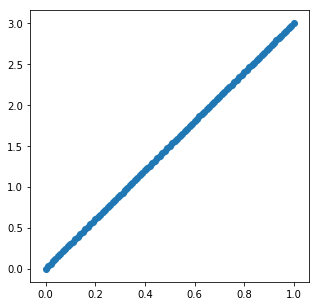

In [186]:
# line
# {av: a in R, a<=1}
v = np.array([3,1])
line_seg = np.array([a/100*v for a in range(101)])

plt.figure(figsize=(5,5))
plt.scatter(line_seg[:,1], line_seg[:,0])
plt.show()

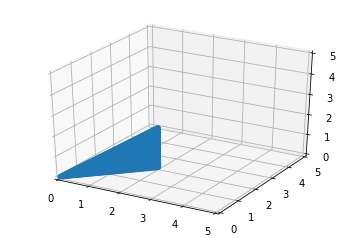

In [207]:
# plane
# {a*v0+b*v1+c*v2: a,b,c in R, a,b,c <=1, a+b+c <= 1}

v0 = np.array([0,0,0])
v1 = np.array([2,2,2])
v2 = np.array([2,2,0])

plane = np.array([a/100*v0 + b/100*v1 + (1-a/100-b/100)*v2 for a in range(101) for b in range(101-a)])
plt3d = plt.figure().gca(projection='3d')
plt3d.scatter(plane[:,0], plane[:,1], plane[:,2])
plt.xlim(0,5)
plt.ylim(0,5)
plt3d.set_zlim(0,5)
plt.show()

### Problem 4.8.7
$\{[x,y,z]:x,y,z\in\mathbb R, x+y+z=1\}$이 벡터공간을 형성함을 증명하거나 그렇지 않는 반례를 제시해 보자. 

답변) "Property 1. 영벡터를 포함한다"에 위반되므로 벡터 공간이 아니다.

x=0, y=0, z=0일때, 0+0+0=1 식이 성립하지 않는다.

### Problem 4.8.8
$\{[x,y,z]:x,y,z\in\mathbb R \quad and \quad x+y+z=0\}$이 벡터공간을 형성함을 증명하거나 그렇지 않는 반례를 제시해 보자. 

답변) 
1. Property 1
 - x=0,y=0,z=0 일때, 0+0+0=0 식을 만족한다.
2. Property 2
 - a(x+y+z)=a*0=0 식을 만족한다.
 - 스칼라 벡터 곱셈에 닫혀 있다.
3. Property 3
 - x+y+z+c=0+c 식을 만족한다.
 - 벡터 덧셈에 닫혀 있다.

### Problem 4.8.9
$\{[x_1,x_2,x_3,x_4,x_5]:x_1,x_2,x_3,x_4,x_5 \in \mathbb R, x_2=0 \quad or\quad x_5=0\}$이 벡터공간임을 증명하거나 그렇지 않는 반례를 제시해 보자,.

답변) 문제의 의도를 파악하지 못함

실수 값에 스칼라를 곱하거나 벡터를 더해도 실수 공간이므로 Property 1, 2, 3모두 만족하므로 벡터공간이다.

### Problem 4.8.10
1. $\nu$를 짝수개의 1을 가지는 GF(2)상의 5-벡터들로 구성된 집합이라 하자. $\nu$는 벡터공간인가?
2. $\nu$를 홀수개의 1을 가지는 GF(2)상의 5-벡터들로 구성된 집합이라 하자. $\nu$는 벡터공간인가?

답변) 둘다 벡터 공간이 아니다.

영벡터를 일단 제외하고라도 1을 곱하게 되면 0과 1의 개수가 변경되므로 짝수는 홀수의 1이 생기고, 홀수는 짝수의 1이 생겨서 스칼라 곱에 닫혀있지 않다.

## 7.2.2 기하학적 구조

기하적 객체의 차원은 객체의 점들에 할당되어야 하는 최소 개수의 좌표이다. 좌표의 수는 기저의 크기이고, 기저의 크기는 주어진 벡터들로 구성된 집합의 랭크이다.

- Span{[1,2,-2]은 직선, 즉 1차원 객체이다. Span{[0,0,0]}은 점, 즉 1차원 구조이다. 척 번째 벡터공간은 차원이 1이고, 두 번째 벡터공간은 차원이 0이다.
- Span{[1,2],[3,4]}은 $\mathbb R^2$의 모든 것, 2차원 객체로 차원이 2이고, Span{[1,3],[2,6]}은 일차종속으로 1차원 객체로 차원이 1이다.
- Span{{1,0,0],[0,1,0],[0,0,1]}은 $\mathbb R^3$의 모든 것, 즉 3차원 객체로 차원이 3이고, Span{[1,0,0],[0,1,0],[1,1,0]}은 일차종속으로 평면 즉 2차원 객체로 차원이 2이다.

## 7.3.3 그래프의 차원 및 랭크

스패닝, 일차독립, 그리고 기저의 개념을 그래프에 적용하여 기술하였다.

연결 서브그래프 T의 랭크는 T내 에지들의 양 끝점인 노드들의 수보다 하나 적다. 